In [1]:
# !pip install reactome2py

In [1]:
from reactome2py import content, analysis
import os, time
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

C:\Users\Enrico\.conda\envs\TFgpu\lib\site-packages\requests\__init__.py:86: RequestsDependencyWarning: Unable to find acceptable character detection dependency (chardet or charset_normalizer).
  warnings.warn(


In [2]:
data_path = "./without_sulfo/compassionate_buck-v2/Leiden-0.5/nodes.csv"
FLD = os.path.split(data_path)[0]
clustering_col = '__leidenCluster'

data = pd.read_csv(data_path)

__leidenCluster
16    577
4     463
15    462
10    431
8     393
12    379
6     372
1     316
2     311
7     275
21    261
3     247
11    194
5     185
17    168
19    165
14    152
13    105
9      77
18     75
20     59
22     54
23     16
Name: count, dtype: int64

---

In [3]:
for cluster,df in data.groupby(clustering_col).__iter__():
    markers = list(set(df.UniAcc))
    print('>> Cluster', cluster, '~', len(markers), 'proteins')

>> Cluster 1 ~ 254 proteins
>> Cluster 2 ~ 244 proteins
>> Cluster 3 ~ 193 proteins
>> Cluster 4 ~ 321 proteins
>> Cluster 5 ~ 166 proteins
>> Cluster 6 ~ 289 proteins
>> Cluster 7 ~ 204 proteins
>> Cluster 8 ~ 261 proteins
>> Cluster 9 ~ 44 proteins
>> Cluster 10 ~ 268 proteins
>> Cluster 11 ~ 126 proteins
>> Cluster 12 ~ 257 proteins
>> Cluster 13 ~ 88 proteins
>> Cluster 14 ~ 117 proteins
>> Cluster 15 ~ 188 proteins
>> Cluster 16 ~ 359 proteins
>> Cluster 17 ~ 136 proteins
>> Cluster 18 ~ 61 proteins
>> Cluster 19 ~ 107 proteins
>> Cluster 20 ~ 44 proteins
>> Cluster 21 ~ 215 proteins
>> Cluster 22 ~ 44 proteins
>> Cluster 23 ~ 11 proteins


In [4]:
for cluster,df in data.groupby(clustering_col).__iter__():
    outpath = os.path.join(FLD, f'cluster{cluster}-reac.csv')
    markers = list(set(df.UniAcc))
    
    if len(markers)<20:
        continue

    print('>> Cluster', cluster, '~', len(markers), 'proteins')
    result = analysis.identifiers(ids=','.join(markers))
    time.sleep(5)
    token = result['summary']['token']
    token_result = analysis.token(token, species='Homo sapiens', page_size='-1', page='-1', 
                                  # sort_by='ENTITIES_FDR', order='ASC', include_disease=True, 
                                  resource='TOTAL', p_value='0.05', 
                                  min_entities=5, max_entities=None)
    enriched_pathways = pd.DataFrame(token_result['pathways'])
    
    enriched_pathways['species_id'] = enriched_pathways.species.apply(lambda x: x.get('taxId',np.nan))
    enriched_pathways['FDR'] = enriched_pathways.entities.apply(lambda x: x.get('fdr',1))
    enriched_pathways['entities_tot'] = enriched_pathways.entities.apply(lambda x: x.get('total',0))
    enriched_pathways['entities_found'] = enriched_pathways.entities.apply(lambda x: x.get('found',0))
    enriched_pathways['reactions_tot'] = enriched_pathways.reactions.apply(lambda x: x.get('total',0))
    enriched_pathways['reactions_found'] = enriched_pathways.reactions.apply(lambda x: x.get('found',0))
    
    enriched_pathways.sort_values('FDR', inplace=True)
    enriched_pathways = enriched_pathways[enriched_pathways.FDR < .05].copy(deep=True)
    print(len(enriched_pathways), 'pathway(s) enriched with FDR < 5%')
    if len(enriched_pathways) > 0:
        enriched_pathways[[
                'species_id','stId','name','FDR',
                'entities_tot','entities_found',
                'reactions_tot','reactions_found'
            ]].to_csv(outpath, index=False)
    print('https://reactome.org/PathwayBrowser/#/DTAB=AN&ANALYSIS=' + token)

>> Cluster 1 ~ 254 proteins
48 pathway(s) enriched with FDR < 5%
https://reactome.org/PathwayBrowser/#/DTAB=AN&ANALYSIS=MjAyNTEyMDUxMzE3MDRfMzEzMzM%3D
>> Cluster 2 ~ 244 proteins
76 pathway(s) enriched with FDR < 5%
https://reactome.org/PathwayBrowser/#/DTAB=AN&ANALYSIS=MjAyNTEyMDUxMzE3MTJfMzEzMzQ%3D
>> Cluster 3 ~ 193 proteins
38 pathway(s) enriched with FDR < 5%
https://reactome.org/PathwayBrowser/#/DTAB=AN&ANALYSIS=MjAyNTEyMDUxMzE3MTlfMzEzMzU%3D
>> Cluster 4 ~ 321 proteins
24 pathway(s) enriched with FDR < 5%
https://reactome.org/PathwayBrowser/#/DTAB=AN&ANALYSIS=MjAyNTEyMDUxMzE3MjZfMzEzMzY%3D
>> Cluster 5 ~ 166 proteins
67 pathway(s) enriched with FDR < 5%
https://reactome.org/PathwayBrowser/#/DTAB=AN&ANALYSIS=MjAyNTEyMDUxMzE3MzRfMzEzMzc%3D
>> Cluster 6 ~ 289 proteins
92 pathway(s) enriched with FDR < 5%
https://reactome.org/PathwayBrowser/#/DTAB=AN&ANALYSIS=MjAyNTEyMDUxMzE3NDFfMzEzMzg%3D
>> Cluster 7 ~ 204 proteins
30 pathway(s) enriched with FDR < 5%
https://reactome.org/PathwayB

--------

In [26]:
combo = []
for cluster,df in data.groupby(clustering_col).__iter__():
    try:
        tmp = pd.read_csv(os.path.join(FLD, f'cluster{cluster}-reac.csv')).head(8)
    except:
        continue
    tmp['cluster'] = f"C{cluster:02}"
    combo.append(tmp)
    del tmp
combo = pd.concat(combo, ignore_index=True)
combo.name = '[' + combo.stId + '] ' + combo.name
combo.tail()

,species_id,stId,name,FDR,entities_tot,entities_found,reactions_tot,reactions_found,cluster
147,9606,R-HSA-9665737,[R-HSA-9665737] Drug resistance in ERBB2 TMD/J...,0.002186,4,3,1,1,C21
148,9606,R-HSA-4839726,[R-HSA-4839726] Chromatin organization,0.000906,269,7,105,20,C22
149,9606,R-HSA-3247509,[R-HSA-3247509] Chromatin modifying enzymes,0.000906,254,7,85,14,C22
150,9606,R-HSA-9772755,[R-HSA-9772755] Formation of WDR5-containing h...,0.016051,42,3,30,10,C22
151,9606,R-HSA-3214841,[R-HSA-3214841] PKMTs methylate histone lysines,0.017926,48,3,22,7,C22


In [27]:
combo.to_csv(os.path.join(FLD,'results_combo.csv'))

In [28]:
results_heatmap = combo.pivot(
    index='name',
    columns='cluster',
    values='FDR'
)
results_heatmap = -1 * np.log10(results_heatmap)
results_heatmap.to_csv(os.path.join(FLD,'results_combo_heatmap.csv'))

In [29]:
reac_clusters = pd.read_csv('ReactomePathsClusters.csv', usecols=['name'])
reac_clusters = reac_clusters.merge(results_heatmap.reset_index(), on='name')
reac_clusters.set_index('name', inplace=True)

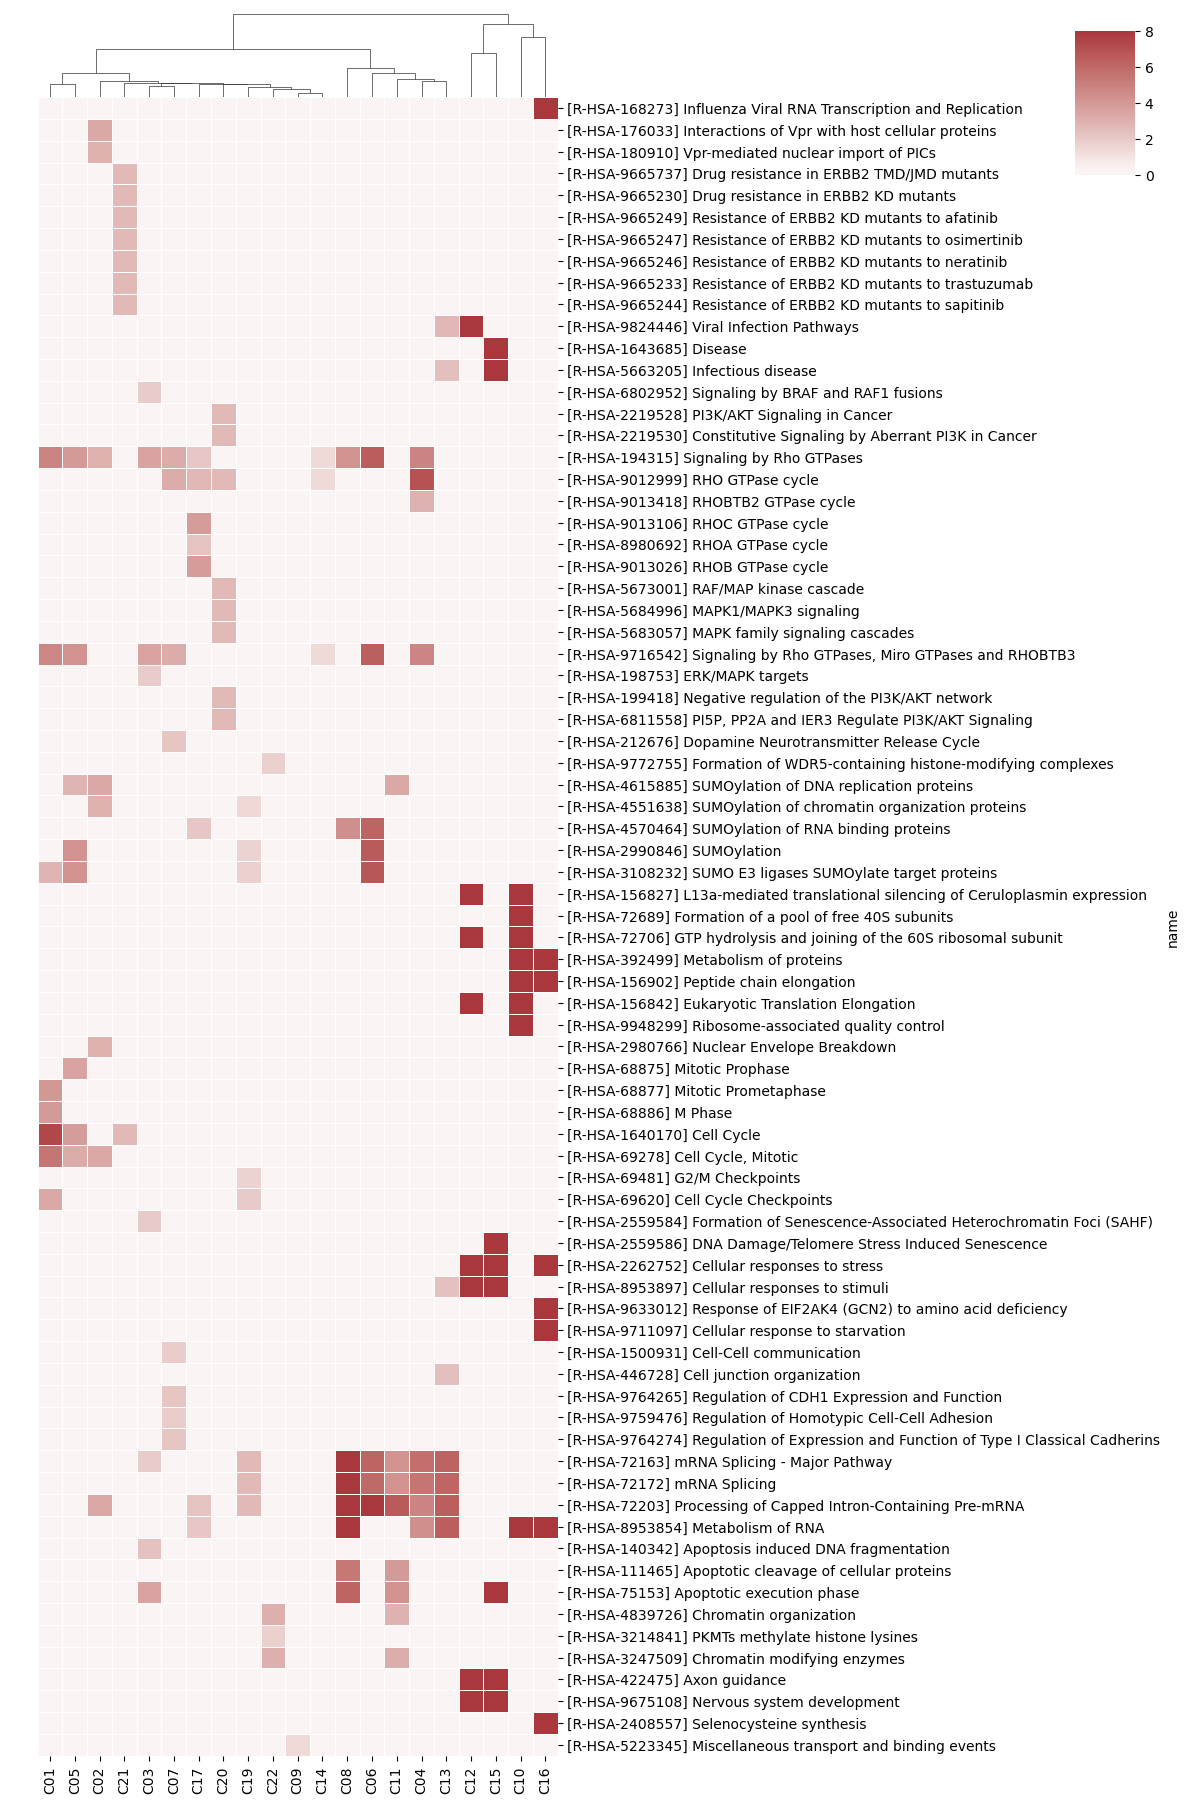

In [31]:
h = sns.clustermap(reac_clusters.fillna(0), method='ward', 
               vmin=0, vmax=8,
               cmap='vlag', center=0, linewidths=0.5, figsize=(12,18),
              cbar_pos=(0.9, 0.9, 0.05, 0.08),
                   # cbar_pos=None,
                   row_cluster=False,
              dendrogram_ratio=.05,)
# plt.xticks(rotation=90)
h.ax_heatmap.set_xticklabels(h.ax_heatmap.get_xticklabels(), rotation=90)
plt.savefig(os.path.join(FLD,'Reactome_clustermap_with_legend.png'), dpi=300, bbox_inches='tight')

---------